# **Palmer Penguins**
*by Neil Tynan @ATU*

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)
###### *“Artwork by @allison_horst”*

## Overview
***
This notebook contains my analysis of the famous [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

This workbook aims to:

1. Source and investigate the Palmer Penguin (PP) dataset.
2. Programmatically explore and visualize the data in it.
3. Identify the types of variables in the dataset and determining which ones might be suitable for analysis.
4. Create a bar chart of approapriate variables in the dataset 
5. Select two variables from the data set and provide an analysis of how correlated they are.

## Libraries
*** 

In [191]:
# Data frames.
import pandas as pd

Pandas - Necessary for the DataFrame data structure due the dataset being available on GItHub in a CSV format (as noted above). 

In [192]:
# Plotting
import matplotlib.pyplot as plt

Matlplotlib - Facilitates the plotting and visualisation of the data.

In [193]:
# Nummerical arrays
import numpy as np

Numpy - Enables the generation of a line of best fit.

## Loading the Data
***

Having sourced the data, the next step towards analysing it involves loading it into the notebook.

In [194]:
# load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

A full overview of the dataset and how it was collected is available on the palmerpenguins [website](https://allisonhorst.github.io/palmerpenguins/).

## Viewing and Testing the Dataset
***

In [195]:
# Looking at an overview of the dataframe
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [196]:
# Look at the first row in detail
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [197]:
# Looking at the data types of each data series
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [198]:
# Getting an idea of the variation in the floats
df.describe ()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [199]:
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [200]:
df['flipper_length_mm']

0      181.0
1      186.0
2      195.0
3        NaN
4      193.0
       ...  
339      NaN
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 344, dtype: float64

The above examples idciate that there were some entries in the dataset where NaN has been used to note a lack of available data. The inclusion of text in what are, otherwise, entirely numeric, float based data series, is going to prove problematic later on when we are attempting to examine these variables and generate a line of best fit. In order to prevent these penguins from potentially throwing off our data, we are going to remove all of these penguins from the dataframe.

In [201]:
df=df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Plotting Variables
***

In [202]:
'Getting body mass'
bmass = df['body_mass_g']
print(bmass)

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64


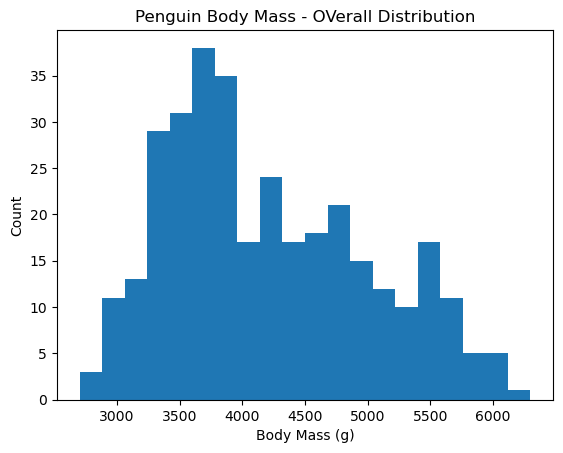

In [203]:
plt.hist(bmass, bins=20)
plt.xlabel('Body Mass (g)')
plt.ylabel('Count')
plt.title('Penguin Body Mass - OVerall Distribution')
plt.show()

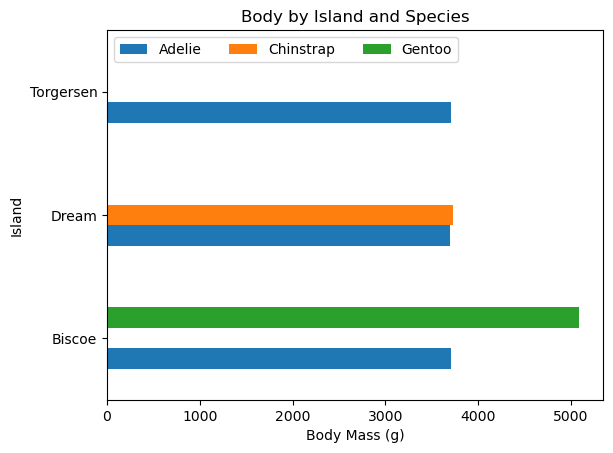

In [270]:
ax=df.groupby(['island', 'species'])['body_mass_g'].mean().unstack().plot.barh()
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Island')
ax.set_title('Body Mass by Island and Species')
ax.legend(loc='upper left', ncols=3)

In [204]:
'Getting flipper length'
flen = df['flipper_length_mm']
print(flen)

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 333, dtype: float64


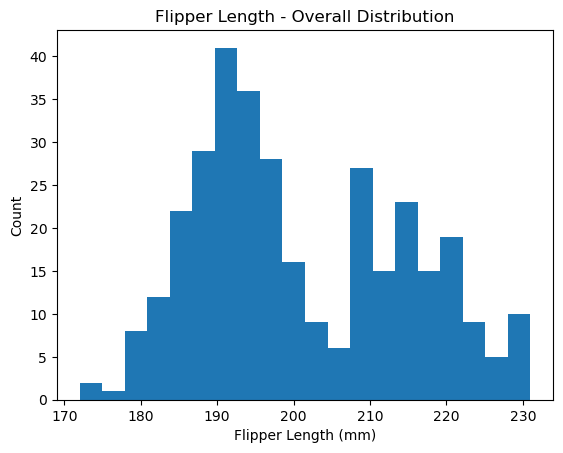

In [205]:
plt.hist(flen, bins=20)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Count')
plt.title('Flipper Length - Overall Distribution')
plt.show()


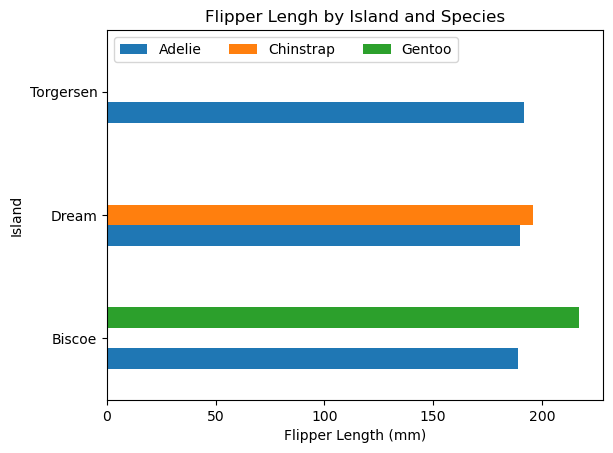

In [269]:
ax=df.groupby(['island', 'species'])['flipper_length_mm'].mean().unstack().plot.barh()
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Island')
ax.set_title('Flipper Lengh by Island and Species')
ax.legend(loc='upper left', ncols=3)

# Comparing the Main Variables
***

In [ ]:
# Fit a straight line between x and y
m, c = np.polyfit(bmass, flen, 1)
m, c

(0.01519526481521767, 137.0396208922547)

'x' is added to the plot to prevent pyplot from drawing lines between each individual point by registering each point as an x. 

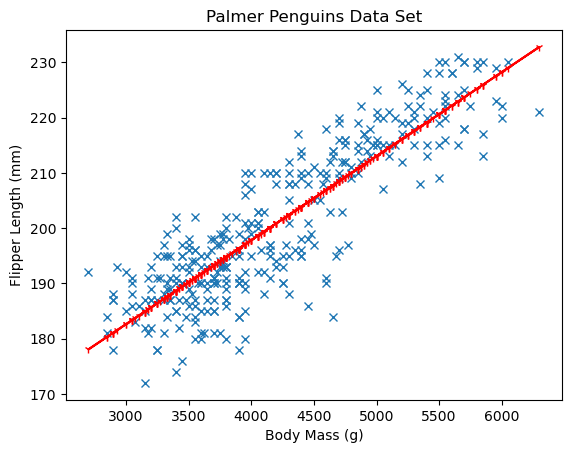

In [ ]:
# Create a new figure and set of axis - stateless
fig, ax = plt.subplots()

#Simple plot
ax.plot(bmass, flen, 'x')

# Axis Labels
ax.set_xlabel ('Body Mass (g)')
ax.set_ylabel ('Flipper Length (mm)')

# Title
ax.set_title ('Palmer Penguins Data Set')


# Simple Plot
ax.plot(bmass, m*bmass + c, 'r-1')

# Looking at Correlation

In [ ]:
# Measuring the correlation
np.corrcoef(bmass,flen)

array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

It can be seen from that graph that there is a clear linear relationship between these two variables. This is further testified to by the correlation coefficiant which, given that it is above 0.8, seems to demonstrate a strong positive relationship between a penguins body mass and the length of their flippers. [GET REFERENCE -LAERD STATISTICS]

*** 

### End